In [1]:
# importing nessasry libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# fatching dataset
df = pd.read_csv('../data/train.csv', index_col='id')
df.head(10)

,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Rings
id,,,,,,,,,
0,F,0.550,0.430,0.150,0.7715,0.3285,0.1465,0.2400,11
1,F,0.630,0.490,0.145,1.1300,0.4580,0.2765,0.3200,11
2,I,0.160,0.110,0.025,0.0210,0.0055,0.0030,0.0050,6
3,M,0.595,0.475,0.150,0.9145,0.3755,0.2055,0.2500,10
4,I,0.555,0.425,0.130,0.7820,0.3695,0.1600,0.1975,9
5,F,0.610,0.480,0.170,1.2010,0.5335,0.3135,0.3085,10
6,M,0.415,0.325,0.110,0.3315,0.1655,0.0715,0.1300,9
7,F,0.610,0.490,0.150,1.1165,0.4955,0.2945,0.2950,9
8,I,0.205,0.150,0.040,0.0460,0.0145,0.0105,0.0100,4


# EDA
+ ### Exlpore data imformation

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 90615 entries, 0 to 90614
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             90615 non-null  object 
 1   Length          90615 non-null  float64
 2   Diameter        90615 non-null  float64
 3   Height          90615 non-null  float64
 4   Whole weight    90615 non-null  float64
 5   Whole weight.1  90615 non-null  float64
 6   Whole weight.2  90615 non-null  float64
 7   Shell weight    90615 non-null  float64
 8   Rings           90615 non-null  int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 6.9+ MB


In [4]:
df.describe()

,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Rings
count,90615.000000,90615.000000,90615.000000,90615.000000,90615.000000,90615.000000,90615.000000,90615.000000
mean,0.517098,0.401679,0.135464,0.789035,0.340778,0.169422,0.225898,9.696794
std,0.118217,0.098026,0.038008,0.457671,0.204428,0.100909,0.130203,3.176221
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.445000,0.345000,0.110000,0.419000,0.177500,0.086500,0.120000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.330000,0.166000,0.225000,9.000000
75%,0.600000,0.470000,0.160000,1.067500,0.463000,0.232500,0.305000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


[]

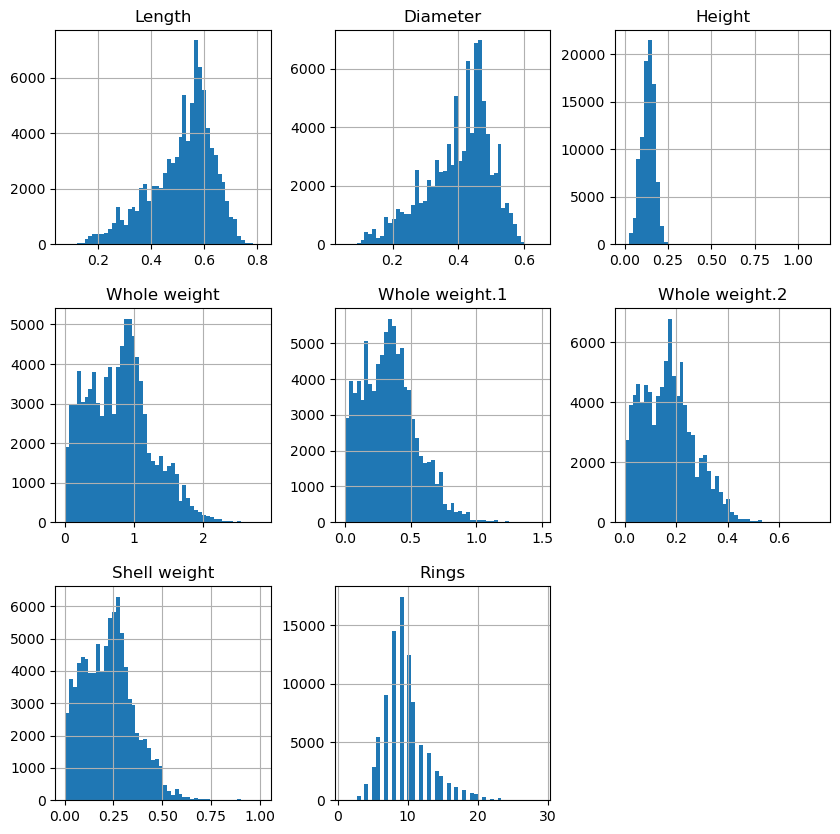

In [5]:
df[['Length', 'Diameter', 'Height', 'Whole weight', 'Whole weight.1',
       'Whole weight.2', 'Shell weight', 'Rings']].hist(bins=50, figsize=(10,10))
plt.title("Distribution of all features")
plt.plot()

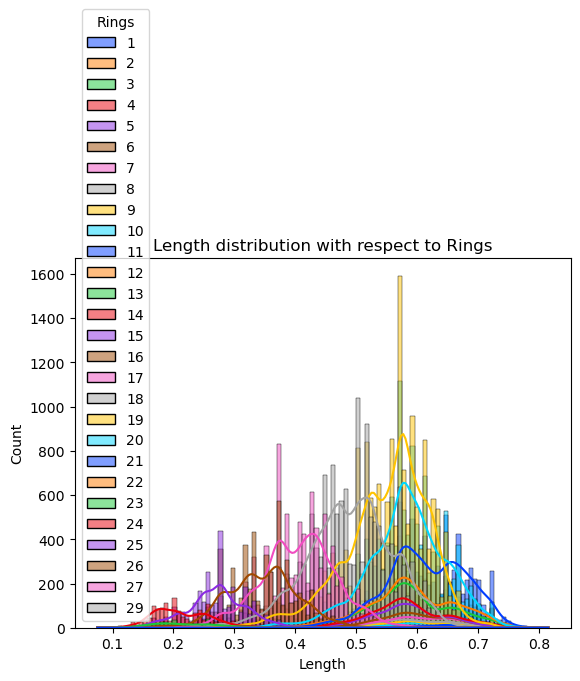

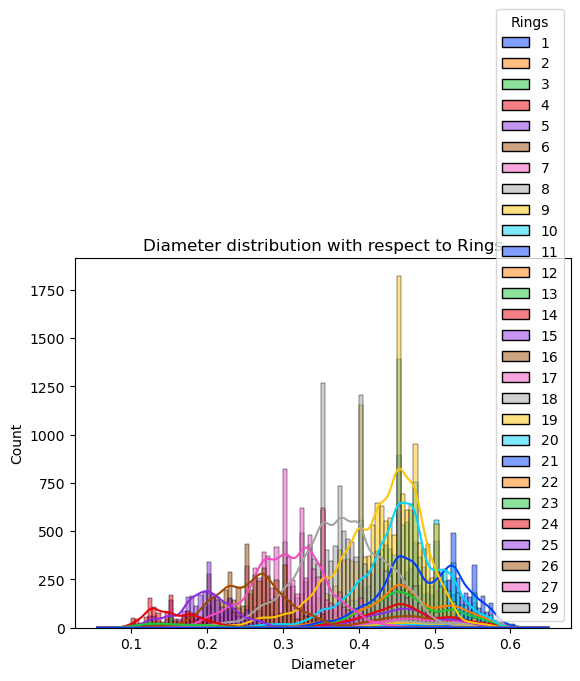

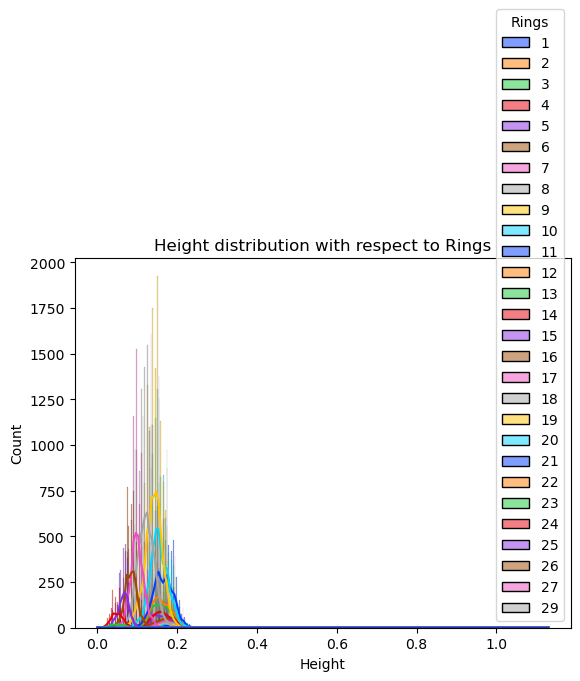

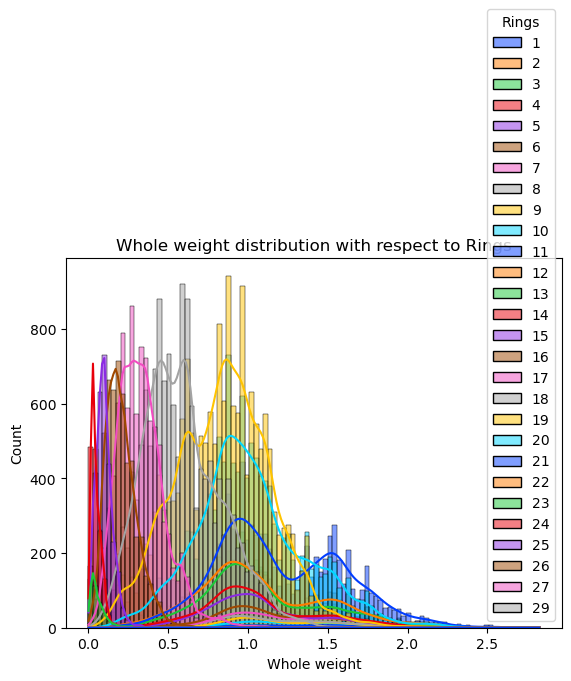

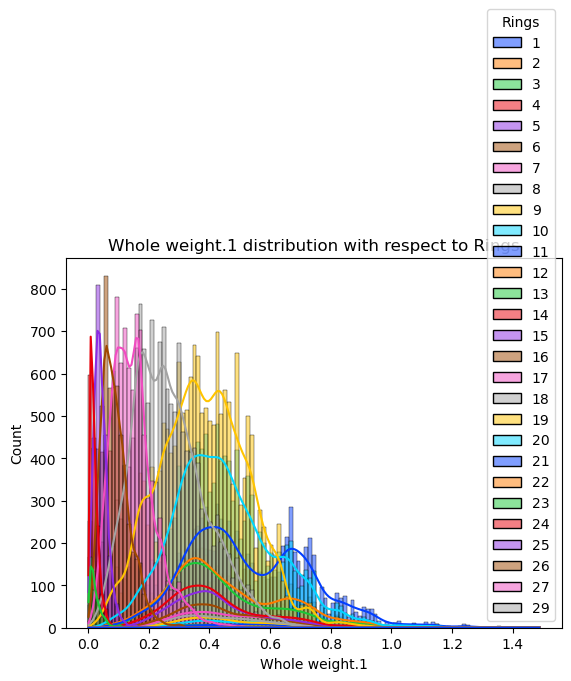

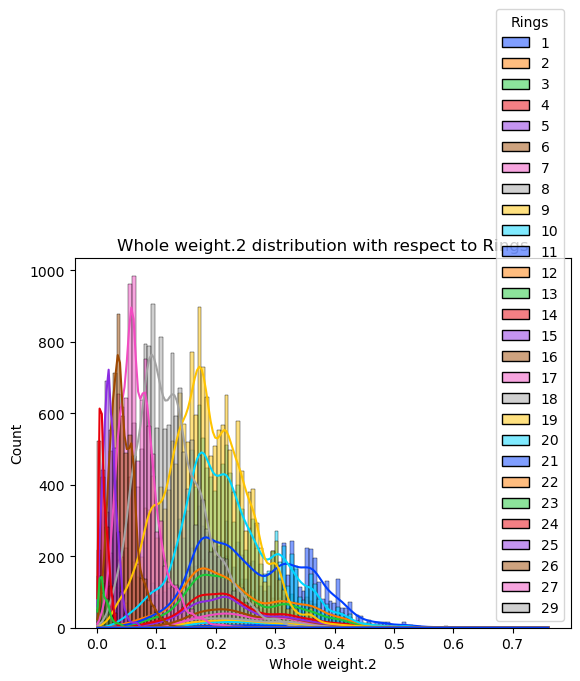

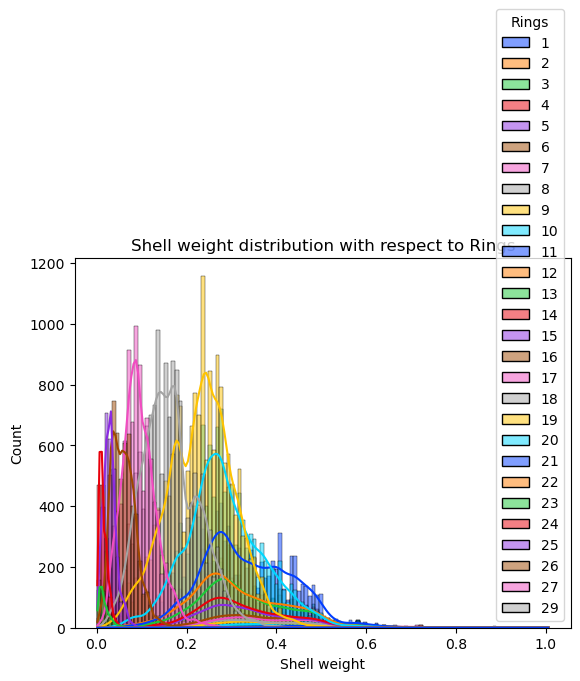

In [6]:
for col in ['Length', 'Diameter', 'Height', 'Whole weight', 'Whole weight.1',
       'Whole weight.2', 'Shell weight']:
    sns.histplot(data=df, x=col, hue='Rings', kde=True, palette="bright")
    plt.title(f"{col} distribution with respect to Rings")
   #  plt.legend(loc='upper right', fontsize='small', title='Rings')
    plt.show()

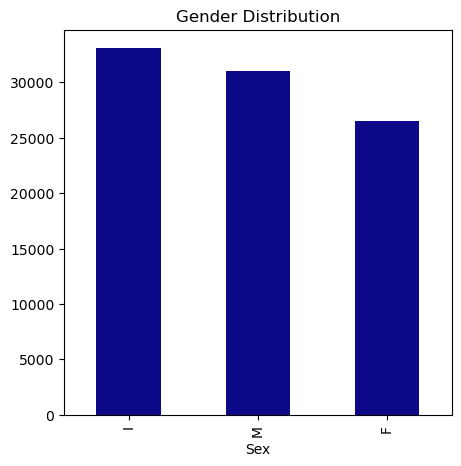

In [7]:
# exploring gender variable
df['Sex'].value_counts().plot(kind='bar', cmap='plasma', figsize=(5,5))
plt.title("Gender Distribution")
plt.show()

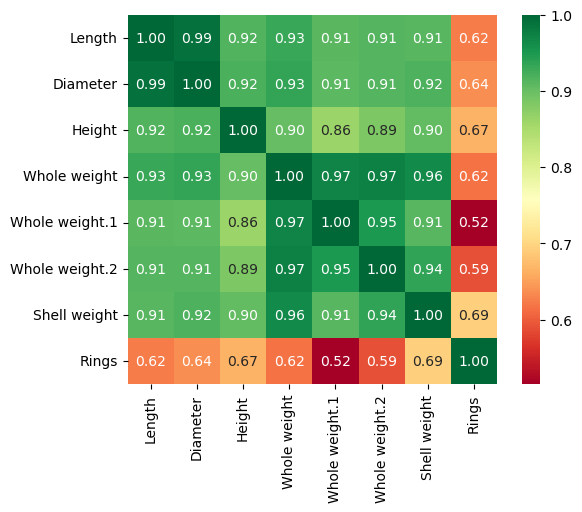

In [8]:
# let's view the correlation heatmap
sns.heatmap(df[['Length', 'Diameter', 'Height', 'Whole weight', 'Whole weight.1',
       'Whole weight.2', 'Shell weight', 'Rings']].corr(), annot=True, cmap='RdYlGn', fmt='.2f', square=True)
plt.show()

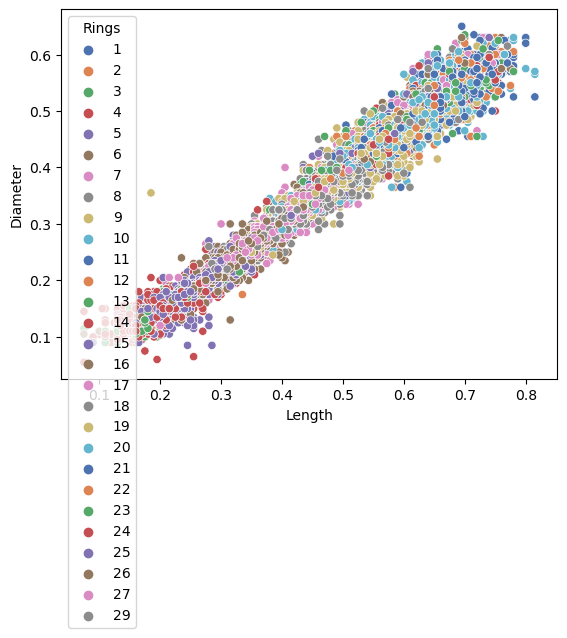

In [9]:
# visualize the correlation between features
sns.scatterplot(data=df, x='Length', y='Diameter', hue='Rings', palette="deep")
plt.show()

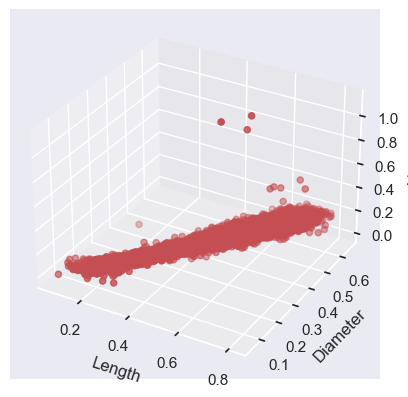

In [10]:
sns.set(style = "darkgrid")
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['Length'], df['Diameter'], df['Height'], c='r', marker='o')

ax.set_xlabel('Length')
ax.set_ylabel('Diameter')
ax.set_zlabel('Height')

plt.show()

In [11]:
# since all features are highly correlated with each other let's view unimporteant features
# to cater that we will use pca
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


# scaling dataset 

scaler = StandardScaler()
X_length = scaler.fit_transform(df[['Length', 'Diameter', 'Height']])
X_weight = scaler.fit_transform(df[['Whole weight', 'Whole weight.1','Whole weight.2', 'Shell weight']])


cov_matrix_length = np.cov(X_length.T)
cov_matrix_weight = np.cov(X_weight.T)


eiganValues_len, eiganVector_len = np.linalg.eig(cov_matrix_length)
eiganValues_weight, eiganVector_weight = np.linalg.eig(cov_matrix_weight)


# applying PCA
pca = PCA(n_components=2)
pca2 = PCA(n_components=2)
lenght_pca = pca.fit_transform(X_length)
weight_pca = pca2.fit_transform(X_weight)

print("Explained variance ratio of length: ", pca.explained_variance_ratio_)
print("Explained variance ratio of weight: ", pca2.explained_variance_ratio_)


Explained variance ratio of length:  [0.96134764 0.03524452]
Explained variance ratio of weight:  [0.96356954 0.0223365 ]


#### let's see the effect of the sex variable on the just created pca

In [12]:
df['length_pca_X'] = lenght_pca[:,0]
df['weight_pca_X'] = weight_pca[:,0]
df['length_pca_y'] = lenght_pca[:,1]
df['weight_pca_y'] = weight_pca[:,1]

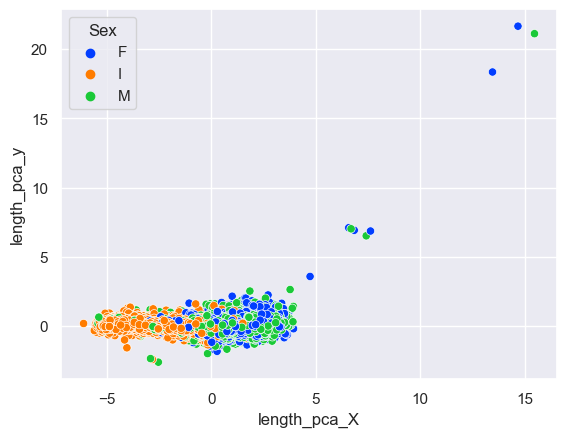

In [13]:
sns.scatterplot(data=df, x='length_pca_X', y='length_pca_y', hue='Sex', palette="bright")
plt.show()


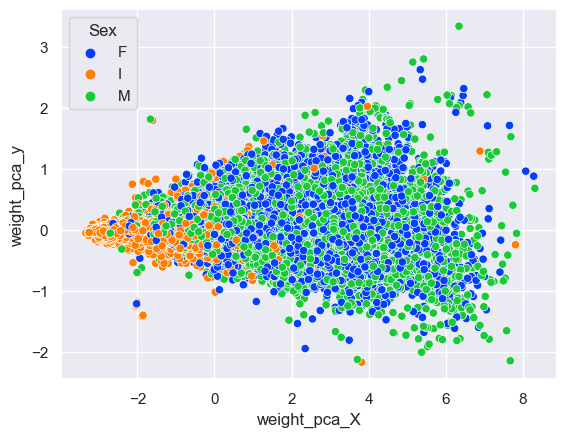

In [14]:
sns.scatterplot(data=df, x='weight_pca_X', y='weight_pca_y', hue='Sex', palette="bright")
plt.show()

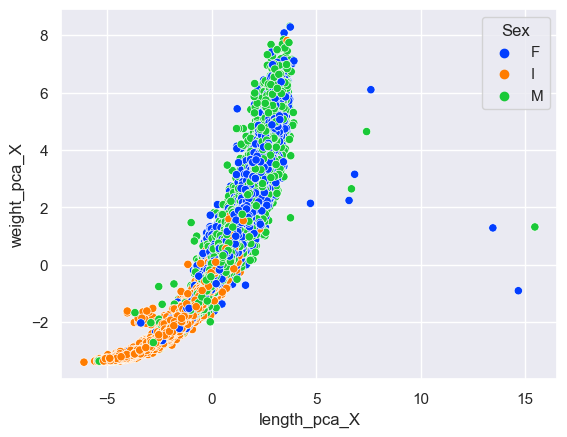

In [15]:
sns.scatterplot(data=df, x='length_pca_X', y='weight_pca_X', hue='Sex', palette="bright")
plt.show()

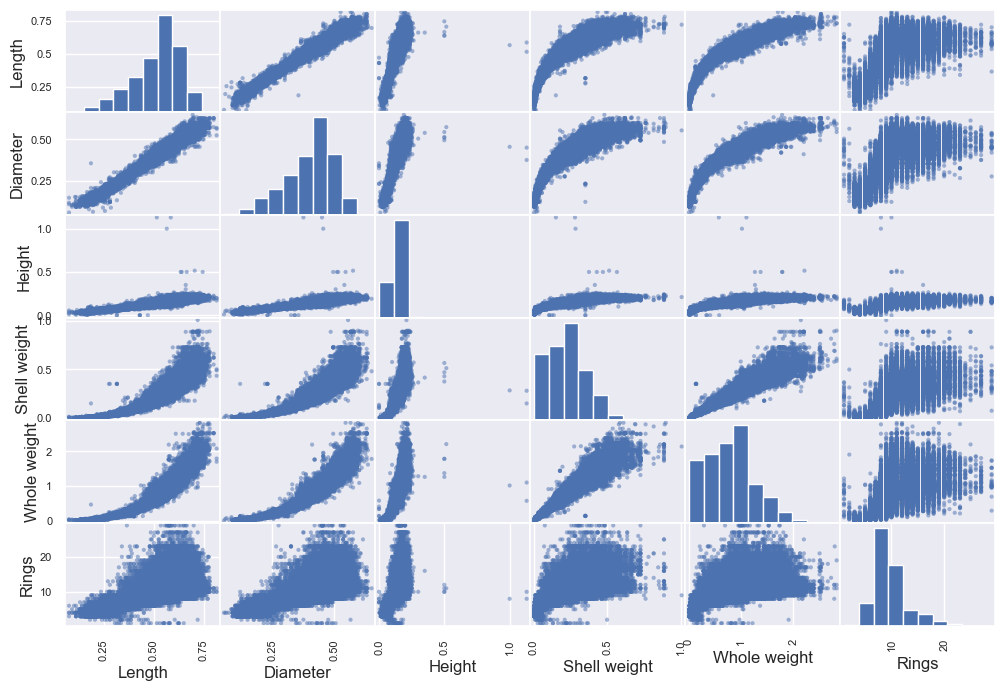

In [16]:
from pandas.plotting import scatter_matrix

scatter_matrix(df[["Length", "Diameter", "Height", "Shell weight", "Whole weight", 'Rings']], figsize=(12, 8))
plt.show()

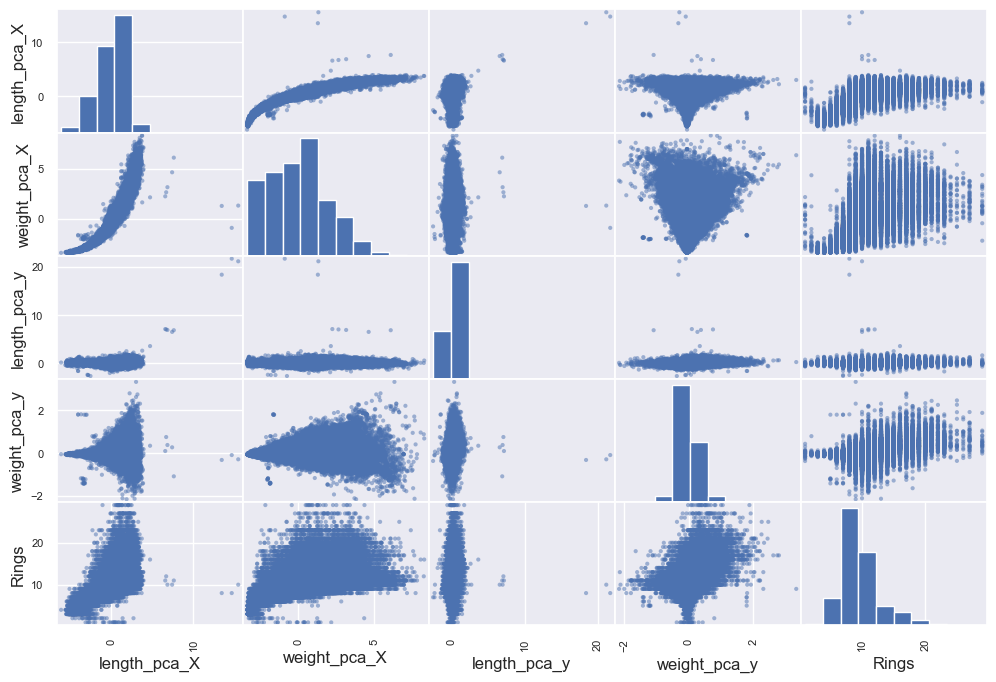

In [20]:


scatter_matrix(df[["length_pca_X", "weight_pca_X", "length_pca_y", "weight_pca_y", 'Sex','Rings']], figsize=(12, 8))
plt.show()